In [1]:
import csv
import pandas as pd
import copy
import numpy as np
from sklearn.metrics import accuracy_score

# Exploratory part

In [2]:
df_rad = pd.read_csv('Dataset/radiometries_train.csv')

One thing that can be explored from the data is that not all peptides seem to be present in the reads. To check that, lets analyze the true-id array:

True-id array max value: 566, and unique values: 206


<AxesSubplot:>

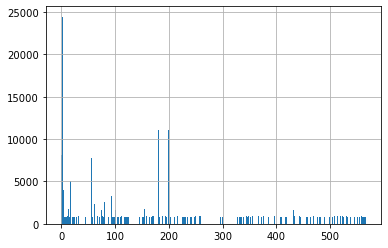

In [3]:
true_labels=df_rad["IDs"].to_numpy();
print("True-id array max value: "+str(np.max(true_labels))+", and unique values: "+str(len(np.unique(true_labels))))
df_rad["IDs"].hist(bins=np.max(true_labels))

We also observe a clear imbalance in the clases. This can be explained because of how the proteins are splitted, maybe some combinations are repeated more. Lets rename the IDS to make the classification between the possible values:

<AxesSubplot:>

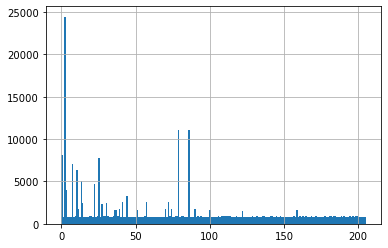

In [4]:
df_rad_ids_ord=df_rad.copy()
label_values=np.unique(true_labels)
label_values.sort()
df_rad_ids_ord['IDs'] = df_rad_ids_ord['IDs'].apply(lambda x: np.argwhere(label_values==x)[0,0])
df_rad_ids_ord['IDs'].hist(bins=len(label_values))

In [5]:
true_labels_ord=df_rad_ids_ord["IDs"].to_numpy(); #Then we can obtain the prior probs given the train data.
unique, counts = np.unique(true_labels_ord, return_counts=True)
prior_probs=counts/np.sum(counts);

In [6]:
# Dumb classifier
y_pred=np.random.choice(len(label_values), len(true_labels_ord), p=prior_probs);
print(accuracy_score(true_labels_ord, y_pred))

0.01735426933102907


In [23]:
1/206

0.0048543689320388345

Given the prior probabilities, the random guessing with them is higher that without prior probs. 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
X=df_rad_ids_ord.drop(columns=["IDs"]).to_numpy();
neigh.fit(X, true_labels_ord);

In [31]:
Y_pred=neigh.predict(X);
print(accuracy_score(true_labels_ord, Y_pred))

0.6853309423006699


It takes quite a lot of time, but 68% is quite better metric than random guessing.

# Comparing on test dataset

In [36]:
df_rad_test = pd.read_csv('Dataset/radiometries_test.csv')
true_labels_test=df_rad_test["IDs"].to_numpy();
#label_values_test=np.unique(true_labels_test)
#label_values_test.sort()
true_labels_test_norm = [np.argwhere(label_values==x)[0,0] for x in true_labels_test]

In [15]:
df_rad_test_ids_ord=df_rad_test.copy()
df_rad_test_ids_ord['IDs'] = df_rad_test_ids_ord['IDs'].apply(lambda x: np.argwhere(label_values==x)[0,0])

In [45]:
# Dumb classifier
y_pred=np.random.choice(len(label_values), len(true_labels_test), p=prior_probs);
#y_pred=np.random.choice(len(label_values), len(true_labels_test));
print(accuracy_score(true_labels_test, y_pred))

0.011372251705837756


Performance decreases with the test set

In [46]:
X=df_rad_test_ids_ord.drop(columns=["IDs"]).to_numpy();
Y_pred=neigh.predict(X);
print(accuracy_score(true_labels_test_norm, Y_pred))

0.5225820426730207


Thats a much better performance!

## Performance with hybrid model

In [49]:
pred_hybridHMM_test = pd.read_csv('Dataset/predictions_hybrid_test.csv')
pred_hybridHMM_test['best_pep_iz'] = pred_hybridHMM_test['best_pep_iz'].apply(lambda x: np.argwhere(label_values==x)[0,0])
HMM_Hybrid_y_pred=pred_hybridHMM_test['best_pep_iz'].to_numpy();
print(accuracy_score(true_labels_test_norm, HMM_Hybrid_y_pred))

0.6155095851835807


Better performance here!